In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  c:\RAI\latest\fairness-variance


# Visualizations

In [4]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'eq_odds_postprocessing'
DATASET_NAME = 'Law_School'
EXPERIMENT_SESSION_UUID = "b1a1a591-575f-414f-af32-1bddca2a0687"
SENSITIVE_ATTRS = ['male', 'race', 'male&race']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(180, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(5)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,male_priv_correct,male_priv_incorrect,overall,race_dis,race_dis_correct,race_dis_incorrect,race_priv,race_priv_correct,race_priv_incorrect,Test_Set_Index
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Law_School,200,OK,2023-11-20 21:18:30.515,b1a1a591-575f-414f-af32-1bddca2a0687,Exp_iter_1,100,...,NaN,NaN,0.899519,0.778736,NaN,NaN,0.923788,NaN,NaN,0
1,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Law_School,200,OK,2023-11-20 21:23:49.082,b1a1a591-575f-414f-af32-1bddca2a0687,Exp_iter_2,200,...,NaN,NaN,0.908173,0.793651,NaN,NaN,0.928612,NaN,NaN,0
2,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Law_School,200,OK,2023-11-20 21:24:01.414,b1a1a591-575f-414f-af32-1bddca2a0687,Exp_iter_4,400,...,NaN,NaN,0.888942,0.790850,NaN,NaN,0.905862,NaN,NaN,0
3,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Law_School,200,OK,2023-11-20 21:24:06.671,b1a1a591-575f-414f-af32-1bddca2a0687,Exp_iter_3,300,...,NaN,NaN,0.901923,0.750000,NaN,NaN,0.929545,NaN,NaN,0
4,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Law_School,200,OK,2023-11-20 21:26:02.756,b1a1a591-575f-414f-af32-1bddca2a0687,Exp_iter_5,500,...,NaN,NaN,0.892308,0.769231,NaN,NaN,0.917293,NaN,NaN,0


In [11]:
df = models_metrics_dct[list(models_metrics_dct.keys())[0]]
df[(df.Metric == 'Accuracy') & (df.Experiment_Iteration == 'Exp_iter_1')].T

,0,5,10,11
Metric,Accuracy,Accuracy,Accuracy,Accuracy
Model_Name,RandomForestClassifier,RandomForestClassifier,RandomForestClassifier,RandomForestClassifier
Model_Params,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...","{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
Dataset_Name,Law_School,Law_School,Law_School,Law_School
Num_Estimators,200,200,2,2
Tag,OK,OK,OK,OK
Record_Create_Date_Time,2023-11-20 21:18:30.515000,2023-11-20 21:29:53.559000,2023-11-20 20:53:38.761000,2023-11-20 20:53:47.195000
Session_Uuid,b1a1a591-575f-414f-af32-1bddca2a0687,b1a1a591-575f-414f-af32-1bddca2a0687,b1a1a591-575f-414f-af32-1bddca2a0687,b1a1a591-575f-414f-af32-1bddca2a0687
Experiment_Iteration,Exp_iter_1,Exp_iter_1,Exp_iter_1,Exp_iter_1
Dataset_Split_Seed,100,100,100,100


In [12]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [13]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [14]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [30]:
test_df = melted_all_subgroup_metrics_per_model_dct["RandomForestClassifier"]
test_df[(test_df['Metric'] == 'Label_Stability') & (test_df['Intervention_Param'] == 1) & (test_df["Subgroup"] == 'overall')][["Metric", "Experiment_Iteration", "Metric_Value"]]

,Metric,Experiment_Iteration,Metric_Value
442,Label_Stability,Exp_iter_1,0.999678
443,Label_Stability,Exp_iter_1,0.968750
221,Label_Stability,Exp_iter_2,0.999591
221,Label_Stability,Exp_iter_4,0.999582
221,Label_Stability,Exp_iter_3,0.999577
221,Label_Stability,Exp_iter_5,0.999510


In [16]:
test_df = melted_all_subgroup_metrics_per_model_dct["RandomForestClassifier"]
test_df[(test_df['Metric'] == 'Label_Stability') & (test_df['Intervention_Param'] == 0) & (test_df["Subgroup"] == 'overall')][["Metric", "Experiment_Iteration", "Metric_Value"]]

,Metric,Experiment_Iteration,Metric_Value
662,Label_Stability,Exp_iter_1,0.952221
663,Label_Stability,Exp_iter_1,0.963462
331,Label_Stability,Exp_iter_2,0.947644
331,Label_Stability,Exp_iter_4,0.950471
331,Label_Stability,Exp_iter_3,0.947750
331,Label_Stability,Exp_iter_5,0.944111


In [17]:
melted_all_subgroup_metrics_per_model_dct['RandomForestClassifier']["Intervention_Param"]= melted_all_subgroup_metrics_per_model_dct['RandomForestClassifier']["Intervention_Param"].astype(bool)

<Figure size 1200x600 with 0 Axes>

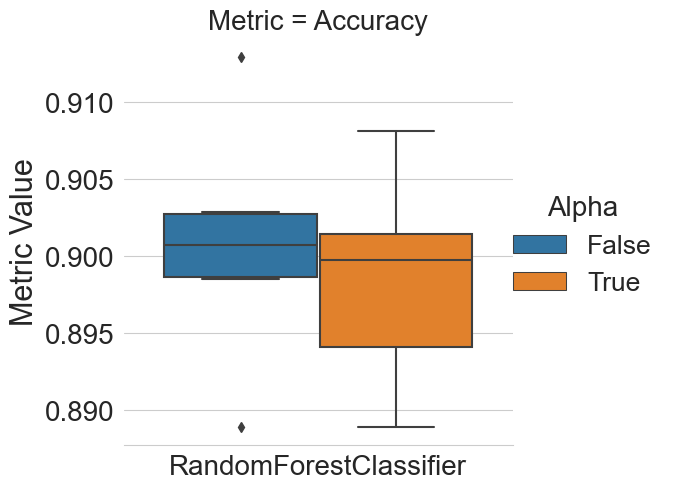

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.8, 0.84),
                                           metric_names=['Accuracy'],
                                           )

<Figure size 1200x600 with 0 Axes>

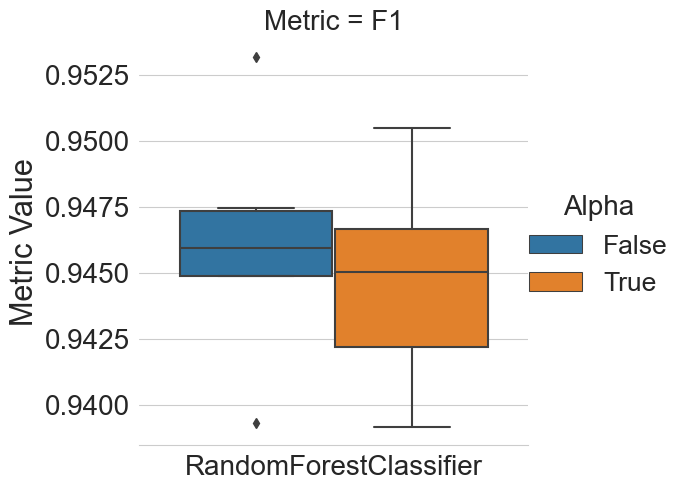

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.40, 0.525),
                                           metric_names=['F1'],
                                           )

<Figure size 1200x600 with 0 Axes>

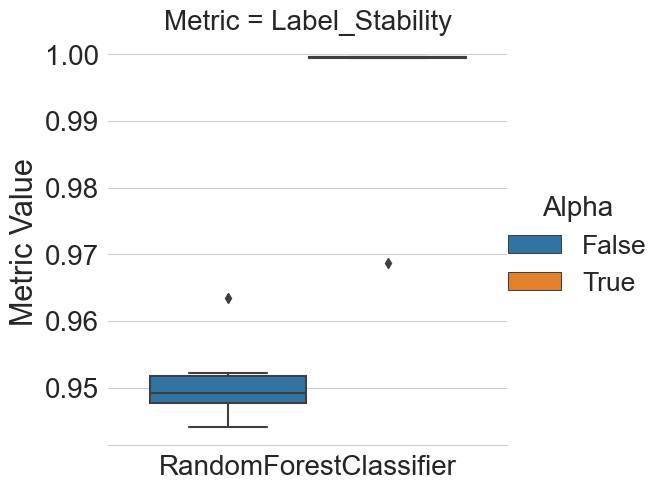

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.925, 1.005),
                                           metric_names=['Label_Stability'])

<Figure size 1200x600 with 0 Axes>

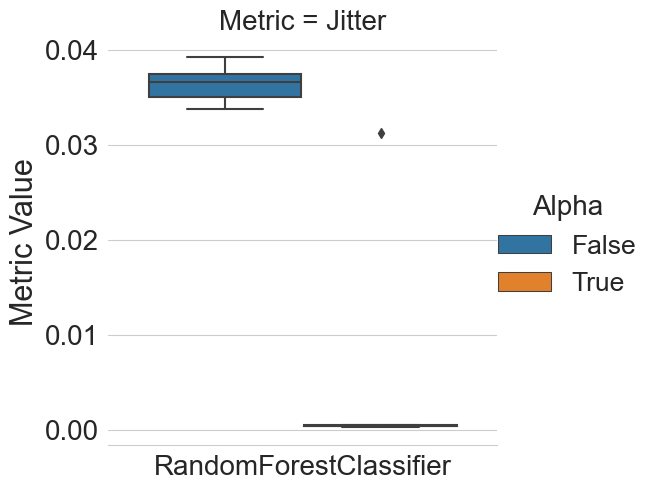

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.925, 1.005),
                                           metric_names=['Jitter'])

<Figure size 1200x600 with 0 Axes>

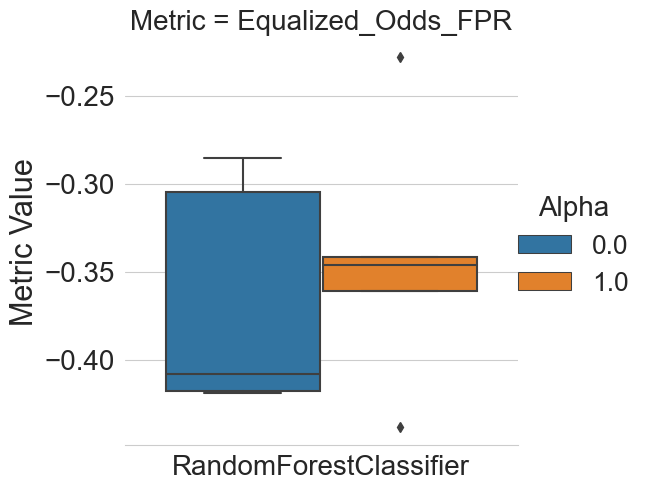

In [22]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Equalized_Odds_FPR'])

<Figure size 1200x600 with 0 Axes>

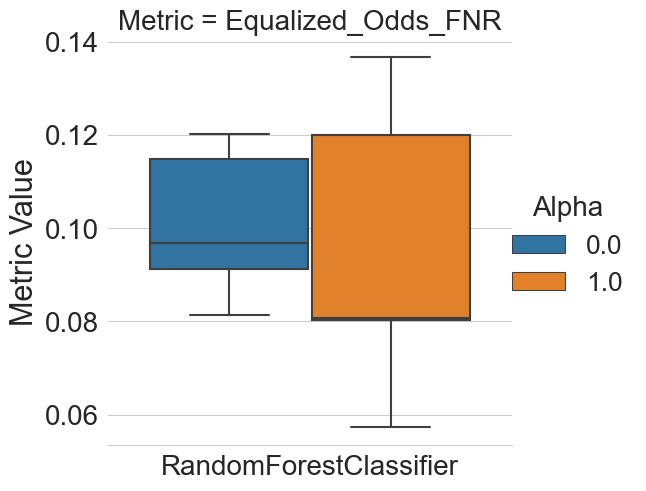

In [23]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Equalized_Odds_FNR'])

<Figure size 1200x600 with 0 Axes>

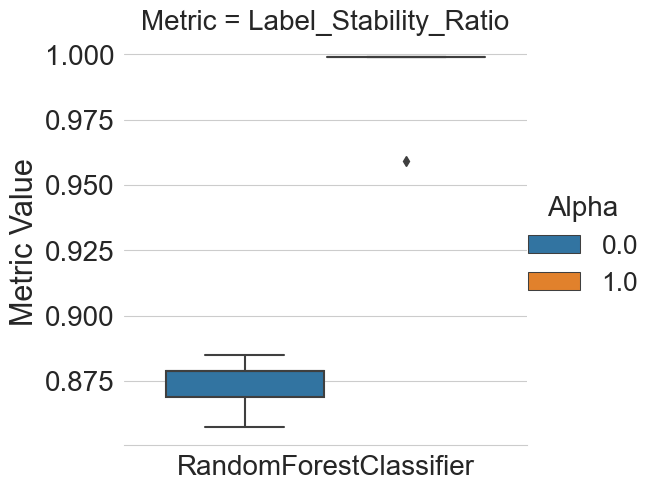

In [26]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Label_Stability_Ratio'])

In [39]:
melted_all_group_metrics_per_model_dct['RandomForestClassifier']['Metric'].unique()

array(['Accuracy_Parity', 'Equalized_Odds_FNR', 'Equalized_Odds_FPR',
       'Jitter_Parity', 'Label_Stability_Ratio',
       'Statistical_Parity_Difference', 'Disparate_Impact',
       'Equalized_Odds_TNR', 'Equalized_Odds_TPR',
       'Aleatoric_Uncertainty_Parity', 'Aleatoric_Uncertainty_Ratio',
       'IQR_Parity', 'Overall_Uncertainty_Parity',
       'Overall_Uncertainty_Ratio', 'Std_Parity', 'Std_Ratio'],
      dtype=object)